Importación de las librerías necesarias

In [5]:
import numpy as np
from sympy import * # Librería de Calculo
from sympy.plotting import plot as symplot # Librería para las gráficas
from sympy.abc import x, y, h # Carga de un simbolico "x"
from sympy.plotting.pygletplot import PygletPlot as Plot # Librería para las gráficas

## Ejercicio 8

Analiza las siguientes expresiones. Crea una función que al introducir las expresiones cree un gráfico con la función junto con sus
raíces, asíntotas y puntos críticos.

$\frac{2x}{x^2+1}$

$\frac{log(x)}{x}$

$\frac{x+1}{\sqrt{x-1}-5}$

$\frac{x^3}{(x-1)^2}-8$

In [6]:
def analisis(f):
  
  # Enseña la expresión recibida
  print("Original:", end="")
  display(f)
  
  # separa la expresión en numerador y denominador
  num, den = f.as_numer_denom()

  # busca los ceros (raíces) del numerador (donde la expresión es 0)
  raices = solve(num)

  # calcula las asíntotas horizontales
  asintotas_horizontales = limit(f,x,oo)

  # calcula las asíntotas verticales
  # solveset es equivalente a solve pero permite definir un dominio (R.Reals), efectivamente barrando todos los resultados que no son numéricos
  # se converte para una lista para poder ser iterable
  asintotas_verticales = list(solveset(den, x, domain=S.Reals))
  
  print("Asíntotas horizontales:",asintotas_horizontales)
  print("Asíntotas verticales:",asintotas_verticales)

  # Calculo de puntos críticos
  # 1) 1a derivada
  derivada = diff(f,x)
  print("Derivada:", end="")
  display(derivada)
  # 2) calcular los ceros de la 1a derivada - el resultado son los puntos críticos
  criticos = solve(derivada, x, domain=S.Reals)
  print("Puntos críticos:", criticos)

  # 3) calcular la 2a derivada
  segunda_derivada = diff(derivada, x, 2)
  # 4) aplicar los puntos críticos en la segunda derivada
  #    si < 0 es un máximo, si > 0 es un mínimo
  criticos_en_segunda_derivada = [segunda_derivada.subs(x, cr) for cr in criticos]
  # 5) imprimir información de minimos y maximos
  #    itera los valores resultantes de sustituir los puntos críticos en la segunda derivada
  #    verifica su signo para descubrir si es máximo o mínimo
  #    imprime el valor del critico y f(critico) - hecho de forma posicional (críticos y criticos_en_segunda_derivada tienen la misma dimensión)
  for crit, crit2d in enumerate(criticos_en_segunda_derivada):
    if crit2d > 0:
      print(f"Hay un mínimo en ({criticos[crit]},{f.subs(x,criticos[crit])})")
    elif crit2d < 0:
      print(f"Hay un máximo en ({criticos[crit]},{f.subs(x,criticos[crit])})")
    else:
      print(f"El punto ({criticos[crit]},{f.subs(x,criticos[crit])}) es inconcluyente")

  # Calcula el valor del eje x
  minimos = min(float(min(criticos)-1), float(min(raices)-1), 0)
  maximos = max(float(max(criticos)+1), float(max(raices)+1))

  import matplotlib.pyplot as plt
  
  # Calcula el valor de f(criticos) -> sale un vector
  criticosY = [f.subs(x,crit) for crit in criticos]

  # Dibuja los puntos criticos
  # plt.plot solo acepta vectores x e y de entrada
  plt.plot(criticos, criticosY, 'k*')

  # Dibuja las raíces
  # hace el calculo de f(raíces) directamente dentro del plot
  plt.plot(raices, [f.subs(x,raiz) for raiz in raices], 'ro')
  
  # Caso exista asíntota horizontal la dibuja
  # toma 2 puntos (automáticamente dibuja una línea entra los 2)
  # punto 1: (valor mínimo del eje x, valor asintotas_horizontales)
  # punto 2: (valor máximo del eje x, valor asintotas_horizontales)
  # efectivamente se varia el valor de x manteniendo el valor de y constante -> línea horizontal
  if asintotas_horizontales != oo:
    plt.plot([minimos,maximos],[asintotas_horizontales,asintotas_horizontales], 'g')

  # Caso existan asíntotas verticales las dibuja
  # toma 2 puntos (automáticamente dibuja una línea entra los 2)
  # punto 1: (valor asíntota vertical, valor mínimo del eje y)
  # punto 2: (valor asíntota vertical, valor máximo del eje y)
  # efectivamente se varia el valor de y manteniendo el valor de x constante -> línea vertical
  for av in asintotas_verticales:
    plt.plot([av, av],[min(criticosY),max(criticosY)], 'y')

  # Dibujar la expresión
  # Se crea un vector que vaya desde el mínimo valor del eje x hasta el máximo, conteniendo 1000 elementos equidistantes
  xx = np.linspace(minimos, maximos, 1000)
  # Se quita valores donde f(x) sea imposible (en las asíntotas verticales)
  if asintotas_verticales:
    xx = xx[xx != asintotas_verticales]
  # se convierte la función simbólica en numérica (lambdify) y se introduce el vector xx -> resultado: vector de f(xx)
  yy = lambdify(x, f)(xx)

  # Dibuja la expresión f(x)
  plt.plot(xx,yy)
  # Cambia VISUALMENTE los ejes x e y
  plt.xlim(minimos,maximos)
  plt.ylim(float(min(criticosY)-1),float(max(criticosY)+1))

  # Enseña gráfica
  plt.show()

Original:

2*x/(x**2 + 1)

Asíntotas horizontales: 0
Asíntotas verticales: []
Derivada:

-4*x**2/(x**2 + 1)**2 + 2/(x**2 + 1)

Puntos críticos: [-1, 1]
Hay un mínimo en (-1,-1)
Hay un mínimo en (1,1)


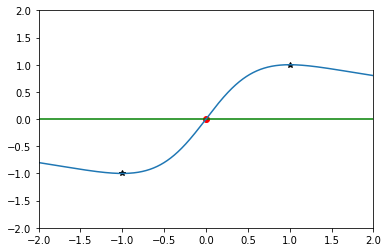

In [7]:
analisis((2*x)/(x**2+1))

Original:

log(x)/x

Asíntotas horizontales: 0
Asíntotas verticales: [0]
Derivada:

-log(x)/x**2 + x**(-2)

Puntos críticos: [E]
Hay un mínimo en (E,exp(-1))


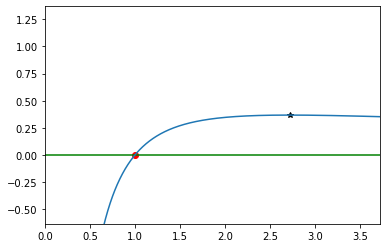

In [8]:
analisis(ln(x)/x)

Original:

(x + 1)/(sqrt(x - 1) - 5)

Asíntotas horizontales: oo
Asíntotas verticales: [26]
Derivada:

1/(sqrt(x - 1) - 5) - (x + 1)/(2*sqrt(x - 1)*(sqrt(x - 1) - 5)**2)

Puntos críticos: [30*sqrt(3) + 53]
Hay un máximo en (30*sqrt(3) + 53,(30*sqrt(3) + 54)/(-5 + sqrt(30*sqrt(3) + 52)))


<lambdifygenerated-3>:2: RuntimeWarning: invalid value encountered in sqrt
  return ((x + 1)/(sqrt(x - 1) - 5))


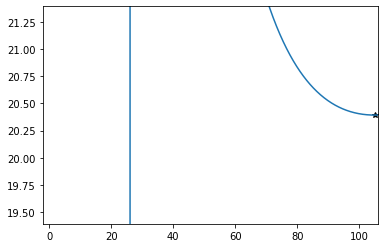

In [9]:
analisis((x+1)/(sqrt(x-1)-5))

Original:

x**3/(x - 1)**2 - 8

Asíntotas horizontales: oo
Asíntotas verticales: [1]
Derivada:

-2*x**3/(x - 1)**3 + 3*x**2/(x - 1)**2

Puntos críticos: [0, 3]
Hay un mínimo en (0,-8)
Hay un máximo en (3,-5/4)


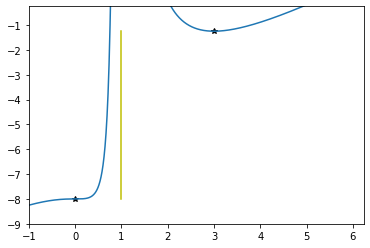

In [10]:
analisis((x**3)/((x-1)**2)-8)

## Ejercicio 9

Una ventana se construye en su parte superior con un semicírculo y en su parte inferior con un rectángulo. Si hay 12m de materiales, ¿cuáles serán las dimensiones de la ventana para que entre la mayor cantidad de luz?

nuevo_y:


-pi*x/2 - x + 6

Puntos criticos: [12/(pi + 4)]
Anchura optima: 24/(pi + 4)
Altura optima: -6*pi/(pi + 4) - 12/(pi + 4) + 6


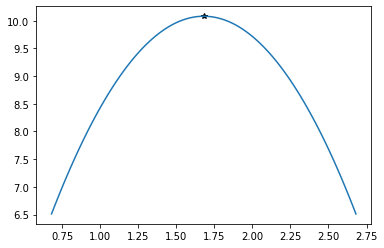

In [11]:
# radio es x
# Perimetro semicirculo
Perimetro_semi = x * (2 + pi)
# Perimetro rectangulo; y es la altura
Perimetro_rect = ((x * 2) + y) * 2

# El perimetro total es 12, así que hay que resolver los perimetros para ese valor
# para no borrar el y (que es simbolico) se crea una nueva variable
# Hay que restar la parte de bajo del semicirculo y la de arriba del rectangulo (porque están unidas) -> x*2
nuevo_y = solve((Perimetro_semi - x * 2) + (Perimetro_rect - x*2) - 12, y)[0]
print("nuevo_y:")
display(nuevo_y)

# Area de semicirculo
Area_semi = (pi * (x ** 2))/2
# area rectangulo
Area_rectangulo = (x * 2) * nuevo_y
# Total de area que se va a minimizar
Area_total = Area_rectangulo + Area_semi
# Hallar la derivada
derivada_Area = diff(Area_total,x)
# Hallar los criticos -> correspondiente al radio (x)
criticos = solve(derivada_Area)
# Hallar los correspondientes valores de y de los criticos
criticosY = [Area_total.subs(x,crit) for crit in criticos]
# Dibujar
import matplotlib.pyplot as plt
plt.plot(criticos, criticosY, 'k*')
plt.plot([crit for crit in np.linspace(float(min(criticos))-1, float(max(criticos))+1, 100)],[Area_total.subs(x,crit) for crit in np.linspace(float(min(criticos))-1, float(max(criticos))+1, 100)])

print("Puntos criticos:", criticos)
print("Anchura optima:", criticos[0]*2)
print("Altura optima:", nuevo_y.subs(x,criticos[0]))

## Ejercicio 10

Determina los puntos sobre $y = x^2 + 1$ más cercanos a $(0, 2)$

Puntos críticos: [0, -sqrt(2)/2, sqrt(2)/2]


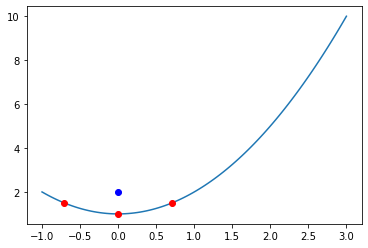

In [12]:
# Versión Manual
puntox = 0
puntoy = 2
f = x**2+1
# Distancia euclidiana
distancia = sqrt((x - puntox)**2 + (f - puntoy)**2)
distancia
derivada = diff(distancia)
criticos = solve(derivada)
print("Puntos críticos:", criticos)
funcion_y = [f.subs(x,puntos) for puntos in np.linspace(-1,3,100)]
plt.plot(np.linspace(-1,3,100), funcion_y)
criticos_y = [f.subs(x,puntos) for puntos in criticos]
plt.plot(criticos, criticos_y, 'ro')
plt.plot(0,2,'ob')